In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Extraction


In [2]:
data_transactions = pd.read_csv('../../outputs/reports/transaction_report.csv')
data_transactions.head()

,date,stock,strategy,operation,price,size,capital,profit_gross,profit_net
0,2021-01-20,MSFT,SMAStrategy10,BUY,208.891780,48,100604.289901,NaN,NaN
1,2021-01-20,GOOGL,SMAStrategy10,BUY,90.633691,112,100604.289901,NaN,NaN
2,2021-01-21,AAPL,SMAStrategy10,BUY,130.247914,78,100889.086631,NaN,NaN
3,2021-01-28,GOOGL,SMAStrategy10,SELL,90.863465,-112,101253.352899,NaN,NaN
4,2021-01-28,GOOGL,SMAStrategy10,TRADE_CLOSE,NaN,0,101253.352899,25.734647,25.734647


In [3]:
data_transactions= data_transactions[data_transactions['operation']=='TRADE_CLOSE']
strategies=data_transactions['strategy'].unique()
columns = ['strategy', 'total_trades', 'profitable_trades', 'losing_trades', 'win_rate_pct', 'total_profit', 'avg_profit', 'max_profit', 'max_loss']
resume_list = []
resume_strat = pd.DataFrame()
for strat in strategies:
    data_strat = data_transactions[data_transactions['strategy'] == strat]
    
    total_trades = len(data_strat)
    
    
    if total_trades > 0:
        profitable_trades = len(data_strat[data_strat['profit_net'] > 0])
        losing_trades = len(data_strat[data_strat['profit_net'] <= 0])
        
        win_rate = (profitable_trades / total_trades) * 100
        
        total_profit = data_strat['profit_net'].sum()
        avg_profit = data_strat['profit_net'].mean()
        max_profit = data_strat['profit_net'].max()
        max_loss = data_strat['profit_net'].min()
        
        resume_list.append({
            'strategy': strat,
            'total_trades': total_trades,
            'profitable_trades': profitable_trades,
            'losing_trades': losing_trades,
            'win_rate_pct': round(win_rate, 2), 
            'total_profit': total_profit,
            'avg_profit': avg_profit,
            'max_profit': max_profit,
            'max_loss': max_loss
        })
resume_strat = pd.DataFrame(resume_list, columns=columns)
resume_strat.head()


,strategy,total_trades,profitable_trades,losing_trades,win_rate_pct,total_profit,avg_profit,max_profit,max_loss
0,SMAStrategy10,80,30,50,37.50,5730.758341,71.634479,3746.013611,-787.599731
1,SMAStrategy30,35,13,22,37.14,10092.965549,288.370444,6389.600830,-574.219113
2,GoldenCrossStrategy1030,5,4,1,80.00,4251.485104,850.297021,1661.897826,-25.045360


# Data visualization

## Total Profit


**Se puede visualizar que la estrategia de cruze de medias, tiende a tener menos outliers y valores positivos lo que podria implicar que es una estrategia que aunque no tenga el mayor profit es mas segura que las otras.** 

<Figure size 1200x600 with 0 Axes>

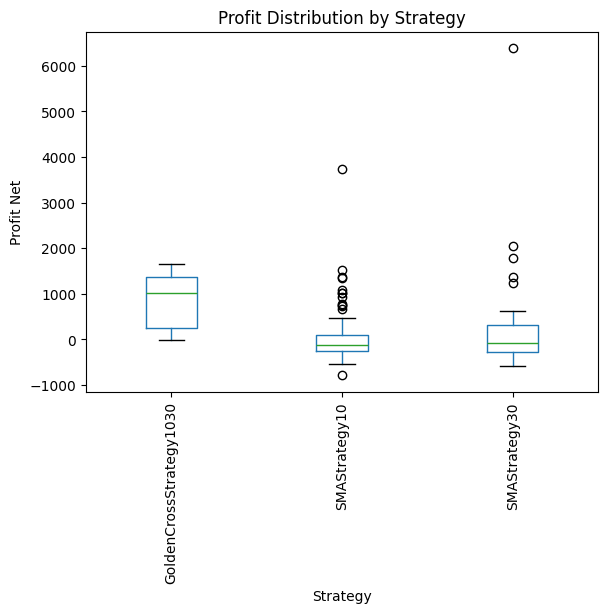

In [4]:
"""boxplot por estatregia con la distribucion dle profit"""
plt.figure(figsize=(12, 6))
data_transactions.boxplot(column='profit_net', by='strategy', grid=False)
plt.title('Profit Distribution by Strategy')
plt.suptitle('')
plt.xlabel('Strategy')
plt.ylabel('Profit Net')
plt.xticks(rotation=90)
plt.show()

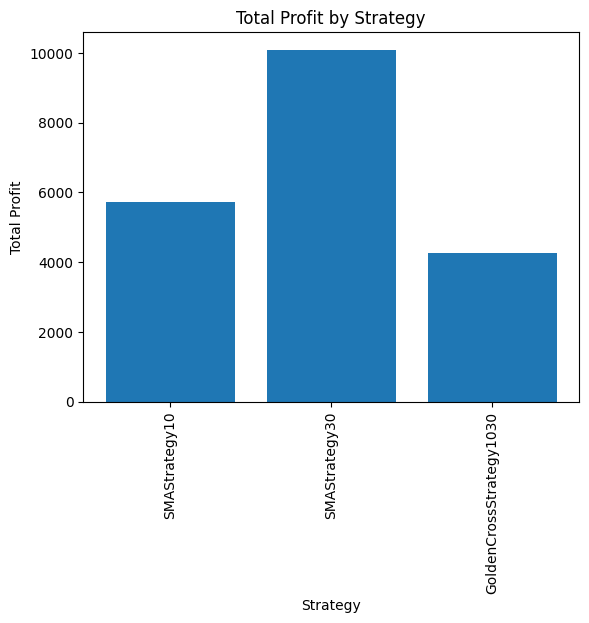

In [5]:
plt.bar(resume_strat['strategy'], resume_strat['total_profit'])
plt.xlabel('Strategy')
plt.xticks(rotation=90)
plt.ylabel('Total Profit')
plt.title('Total Profit by Strategy')
plt.show()

## Trades

**A pesar de tener mayor ratio de losing profits la estrategia de cruze de media de 10 dias tuvo un rendimiento bueno. lo que habla de un perfil de riesgo elevado**

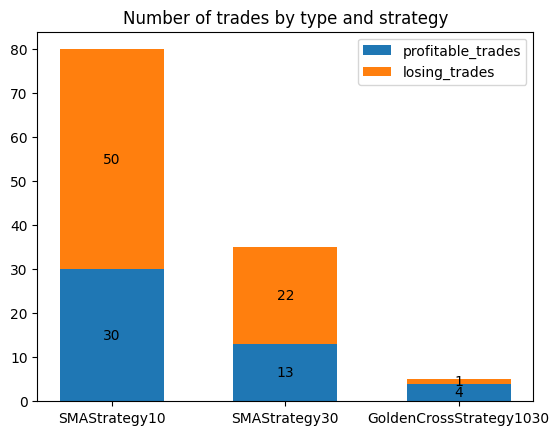

In [6]:
strats = resume_strat['strategy'].tolist()
trades = {
    'profitable_trades': resume_strat['profitable_trades'].tolist(),
    'losing_trades': resume_strat['losing_trades'].tolist()
}

x = np.arange(len(strats))

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for trade, exitos  in trades.items():
    p = ax.bar(strats, exitos, width, label=trade, bottom=bottom)
    bottom += exitos

    ax.bar_label(p, label_type='center')

ax.set_title('Number of trades by type and strategy')
ax.legend()

plt.show()